# SVM with NO PCA

In [ ]:
import numpy as np
from keras.datasets import cifar10
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


def load_images():
    # Load CIFAR-10 data
    (X_train, y_train), (X_test, y_test) = cifar10.load_data()

    # transform to vectors
    X_train = X_train.reshape(X_train.shape[0], -1)
    X_test = X_test.reshape(X_test.shape[0], -1)

    # Normalisation
    X_train = X_train.astype('float32') / 255
    X_test = X_test.astype('float32') / 255

    return X_train, y_train, X_test, y_test

X_train, y_train, X_test, y_test = load_images()
# Trainl
svm = SVC(kernel='linear', C=1, random_state=0)
svm.fit(X_train, y_train.ravel())

# Predictions on test data
y_pred = svm.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


# Check PCA

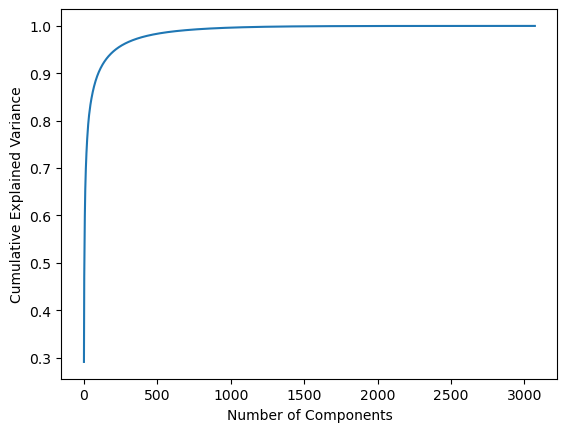

In [3]:
import numpy as np
from keras.datasets import cifar10
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
def load_images():
    # Load CIFAR-10 data
    (X_train, y_train), (X_test, y_test) = cifar10.load_data()

    # transform to vectors
    X_train = X_train.reshape(X_train.shape[0], -1)
    X_test = X_test.reshape(X_test.shape[0], -1)

    # Normalisation
    X_train = X_train.astype('float32') / 255
    X_test = X_test.astype('float32') / 255

    return X_train, y_train, X_test, y_test

X_train, y_train, X_test, y_test = load_images()
# Perform PCA
pca = PCA(n_components=X_train.shape[1])
pca.fit(X_train)

# Plot explained variance as a function of the number of components
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

# with PCA

In [4]:
# Reduce dimensionality using PCA
pca = PCA(n_components=300)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Train SVM model
svm = SVC(kernel='rbf', C=10, gamma=0.001)
svm.fit(X_train_pca, y_train)

# Make predictions on test set
y_pred = svm.predict(X_test_pca)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)

print('Accuracy:', accuracy)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.5298
